<a href="https://colab.research.google.com/github/mohith2326/pdsA-S/blob/question1/3stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Stage 1: Data Preparation
import os
import pandas as pd

directories = ['data_raw', 'data_cleaned', 'analysis_scripts', 'results', 'report', 'figures', 'code']
for directory in directories:
    if not os.path.exists(directory):
        os.makedirs(directory)
raw_data = pd.read_csv('/content/drive/MyDrive/raw_data.csv')
cleaned_data = raw_data.copy()
cleaned_data.to_csv('data_cleaned/cleaned_data.csv', index=False)


In [22]:
raw_data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [23]:
cleaned_data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


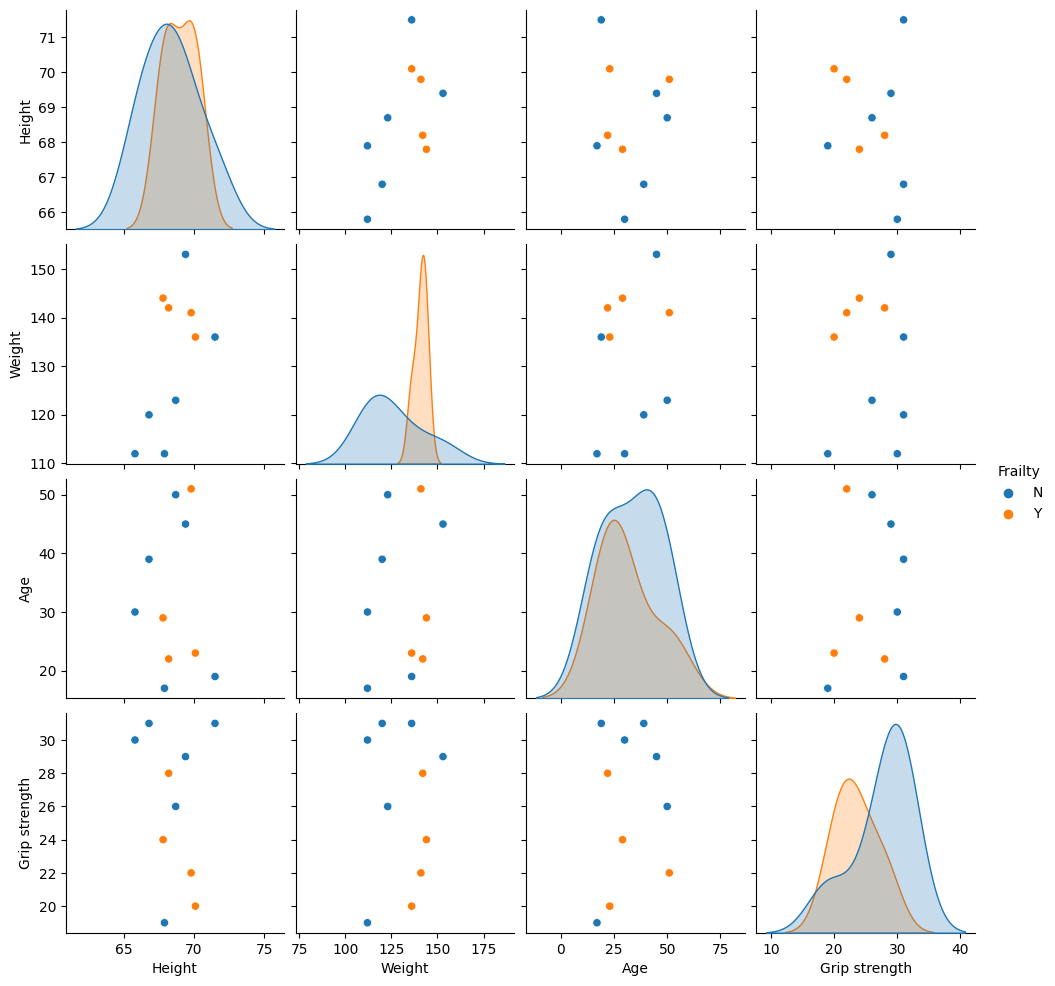

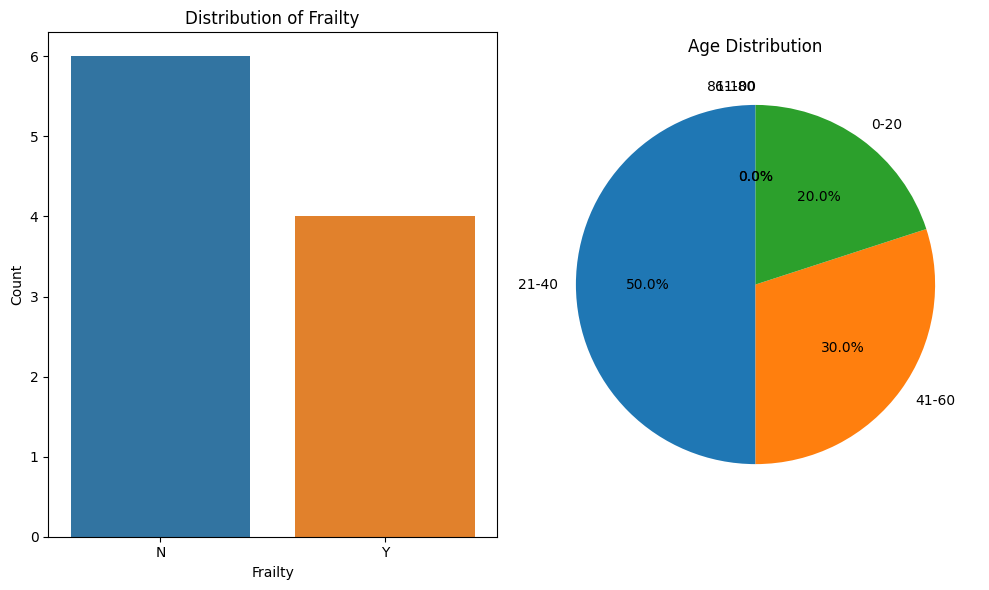

In [24]:
# Stage 2: Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

cleaned_data = pd.read_csv('data_cleaned/cleaned_data.csv')
sns.pairplot(cleaned_data, hue='Frailty')
plt.savefig('results/pairplot.png')
descriptive_stats = cleaned_data.describe()
frailty_counts = cleaned_data['Frailty'].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=frailty_counts.index, y=frailty_counts.values)
plt.title('Distribution of Frailty')
plt.xlabel('Frailty')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
cleaned_data['Age Group'] = pd.cut(cleaned_data['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = cleaned_data['Age Group'].value_counts()
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution')
plt.tight_layout()
plt.savefig('results/frailty_age_distribution.png')




In [ ]:
#stage3: Correlation analysis
correlation_matrix = cleaned_data.corr(numeric_only=True)
print("Correlation Matrix:\n", correlation_matrix)
correlation_matrix.to_csv('results/correlation_matrix.csv')
X = cleaned_data[['Age']]
y = cleaned_data['Grip strength']
model = LinearRegression()
model.fit(X, y)
predicted_grip_strength = model.predict(X)
model_results = {
    'Coefficients': model.coef_,
    'Intercept': model.intercept_,
}
print("Linear Regression Model Results:")
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')




Correlation Matrix:
                  Height    Weight       Age  Grip strength
Height         1.000000  0.571525 -0.032580      -0.167682
Weight         0.571525  1.000000  0.190926       0.032807
Age           -0.032580  0.190926  1.000000       0.133756
Grip strength -0.167682  0.032807  0.133756       1.000000
Linear Regression Model Results:
Coefficients: [0.04702721]
Intercept: 24.471615720524017
